Example of 'preprocess' step in which an input file describing the study region is discretized in H3 cells, visualized, and exported back.

In [1]:
import geopandas
import h3
import folium
import matplotlib
import numpy as np
import json
from shapely.geometry import Polygon
import importlib
import numpy

import sys
sys.path.append('../')

import DiscretizationBox
import DiscretizationBox.folium
import DiscretizationBox.travel_times.graphhopper
from DiscretizationBox.add_regressors import addRegressorUniformDistribution


Import and visualize the original region:

In [2]:
data_path = "C:/Users/Elogroup/GiovanniAmorim/Personal/ProjetoAmbulancias/dados/entrada/rj/rj.shp"

<AxesSubplot:>

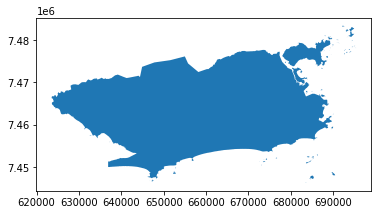

In [3]:
gdf = geopandas.read_file(data_path).reset_index()
gdf.plot()

Discretize it using the generate_discretization function. This uses Uber's H3 library function the find the H3 cells that better aproximate the study region in the given resolution.

In [4]:
help(DiscretizationBox.generate_discretization)

Help on function generate_discretization in module DiscretizationBox.interface:

generate_discretization(gdf, shape='hexagons', *, nx=10, ny=10, neighborhood_type='8', h3_discretization_level=6, export_friendly=False) -> geopandas.geodataframe.GeoDataFrame
    Generate an enriched, discretized GeoDataFrame from the original geodataframe. The GeoDataFrame returned should work seamlessly with
        other functions provided within this module.
    
    Arguments:
        gdf : (string, GeoDataFrame) - a path to a GeoDataFrame or a GeoDataFrame object
        shape : ('rectangles', 'hexagons', 'none', False) - the shape in which the space should be discretized. If 'none' or False, no discretization is done
    Keyword only arguments:
        nx, ny : (int) - if using 'rectangles', define how many subdivision to use on the discretization, on the x and y axis respectively
        neighborhood : ('8', '4') - if using 'rectangles', defines the type of neighborhood to be added to the returned

We can use a simpler 'rectangles' discretization:

<AxesSubplot:>

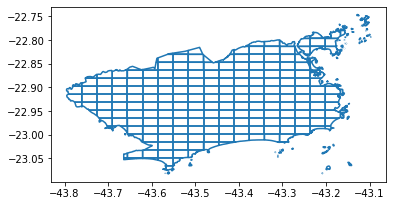

In [5]:
square_discretized_gdf = DiscretizationBox.generate_discretization(gdf, shape = 'rectangles', nx = 20, ny = 20, neighborhood_type = '8')
square_discretized_gdf.boundary.plot()

Or hexagons, using Uber's H3 library

<AxesSubplot:>

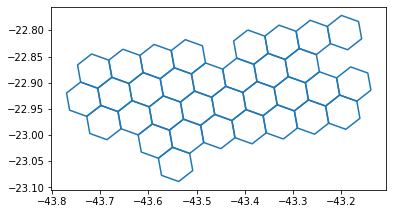

In [6]:
discretized_gdf = DiscretizationBox.generate_discretization(gdf, shape = 'hexagons', h3_discretization_level = 6)
discretized_gdf.boundary.plot()

Either way, the return is also a geodataframe, in the following format:

In [7]:
discretized_gdf.head(3)

,geometry,area,center_lat,center_lon,neighbors,h3_index
0,"POLYGON ((-43.55017 -23.02319, -43.55654 -22.9...",37.149336,-23.011396,-43.585740,"[17, 1, 5, 23]",86a8a039fffffff
1,"POLYGON ((-43.65687 -22.98780, -43.62131 -22.9...",37.176061,-22.966883,-43.627674,"[0, 16, 20, 23, 28]",86a8a02a7ffffff
2,"POLYGON ((-43.50453 -22.91588, -43.46896 -22.9...",37.230357,-22.894918,-43.475335,"[3, 4, 27, 30, 32]",86a8a0667ffffff


The 'neighbors' column is a list of every other cell neighboring a given cell (in no particular order)

<AxesSubplot:>

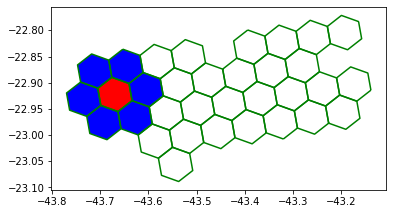

In [8]:
cell_index = int(len(discretized_gdf) / 2)
ax = discretized_gdf.iloc[discretized_gdf['neighbors'][cell_index]].plot(color = 'blue')
ax = discretized_gdf.iloc[[cell_index]].plot(ax = ax, color = 'red')
discretized_gdf.boundary.plot(ax = ax, color = 'green')

We can use overlay between from different areas to calculate regressor values 

In [9]:
regressors_df = square_discretized_gdf[['geometry']].copy()
regressors_df['regressor_value'] = np.random.random(len(regressors_df))
addRegressorUniformDistribution(discretized_gdf,regressors_df)

,geometry,area,center_lat,center_lon,neighbors,h3_index,regressor_value
0,"POLYGON ((-43.55017 -23.02319, -43.55654 -22.9...",37.149336,-23.011396,-43.585740,"[17, 1, 5, 23]",86a8a039fffffff,1.993049
1,"POLYGON ((-43.65687 -22.98780, -43.62131 -22.9...",37.176061,-22.966883,-43.627674,"[0, 16, 20, 23, 28]",86a8a02a7ffffff,3.508190
2,"POLYGON ((-43.50453 -22.91588, -43.46896 -22.9...",37.230357,-22.894918,-43.475335,"[3, 4, 27, 30, 32]",86a8a0667ffffff,2.167909
3,"POLYGON ((-43.39782 -22.95120, -43.40420 -22.9...",37.203504,-22.939429,-43.433390,"[2, 25, 27, 30, 31, 13]",86a8a075fffffff,3.983415
4,"POLYGON ((-43.50453 -22.91588, -43.51090 -22.8...",37.221257,-22.904086,-43.540092,"[2, 20, 23, 30, 11, 32]",86a8a0297ffffff,2.148479
5,"POLYGON ((-43.55017 -23.02319, -43.57937 -23.0...",37.122518,-23.055876,-43.543800,"[0, 17]",86a8a0397ffffff,3.683471
6,"POLYGON ((-43.16431 -22.78313, -43.19989 -22.7...",37.301164,-22.804175,-43.193496,[15],86a8a068fffffff,3.690254
7,"POLYGON ((-43.32028 -23.00740, -43.29109 -22.9...",37.185392,-22.974690,-43.326667,"[22, 25, 8, 31]",86a8a0627ffffff,2.957169
8,"POLYGON ((-43.29747 -22.95372, -43.26828 -22.9...",37.221195,-22.920988,-43.303859,"[22, 7, 26, 9, 31, 12]",86a8a0607ffffff,2.466921
9,"POLYGON ((-43.28744 -22.83450, -43.31663 -22.8...",37.256930,-22.867248,-43.281055,"[15, 26, 8, 29, 12]",86a8a061fffffff,3.724655


We can then export the discretization to file in all the formats supported by geopandas / fiona

In [10]:
DiscretizationBox.save_gdf(discretized_gdf, 'test', driver='ESRI Shapefile')

A list of all supported formats:

In [11]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

For reimporting, we use load_gdf:

In [12]:
t1 = DiscretizationBox.load_gdf('test/test.shp')
t1.head(3)

,geometry,area,center_lat,center_lon,neighbors,index,h3_index
0,"POLYGON ((-43.55017 -23.02319, -43.57937 -23.0...",37.149336,-23.011396,-43.585740,"[17, 1, 5, 23]",0,86a8a039fffffff
1,"POLYGON ((-43.65687 -22.98780, -43.66324 -22.9...",37.176061,-22.966883,-43.627674,"[0, 16, 20, 23, 28]",1,86a8a02a7ffffff
2,"POLYGON ((-43.50453 -22.91588, -43.51090 -22.8...",37.230357,-22.894918,-43.475335,"[3, 4, 27, 30, 32]",2,86a8a0667ffffff


We can also obtain a distance matrix for these hexagons.

You must first set your graphhopper api key. Try not use all your credits at once! Be careful with large areas and/or small cells. 

In [ ]:
DiscretizationBox.travel_times.graphhopper.set_graphhopper_key("GH_KEY")

In [ ]:
dist_matrix = DiscretizationBox.travel_times.graphhopper.distance_matrix_from_gdf(discretized_gdf)
dist_matrix

We can then cache it into a file, so we don't spend too many credits over time

In [ ]:
numpy.save('dist_matrix.npy'), dist_matrix, allow_pickle = True)

We can then read it back easily:

In [ ]:
dist_matrix_read = numpy.load('dist_matrix.npy', allow_pickle = True)
dist_matrix_read